In [1]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/MDalamin5/Machine-Learning-2.0/refs/heads/main/2.5-Understanding-Data/Basics-Question-To-Data/train.csv", usecols=['Age', "Fare", "Survived"])
df.head(5)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
from sklearn.impute import SimpleImputer
new_df = ColumnTransformer(transformers=[
    ('age_mising', SimpleImputer(), [1])
    ], remainder='passthrough')

In [6]:
new_df.fit_transform(df)

array([[22.        ,  0.        ,  7.25      ],
       [38.        ,  1.        , 71.2833    ],
       [26.        ,  1.        ,  7.925     ],
       ...,
       [29.69911765,  0.        , 23.45      ],
       [26.        ,  1.        , 30.        ],
       [32.        ,  0.        ,  7.75      ]])

In [7]:
df.head(1)

,Survived,Age,Fare
0,0,22.0,7.25


In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25008\2675817237.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
df.tail(1)

,Survived,Age,Fare
890,0,32.0,7.75


In [12]:
y = df.iloc[:, 0]
X = df.iloc[:, 1:]
X.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [13]:
X_trian, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

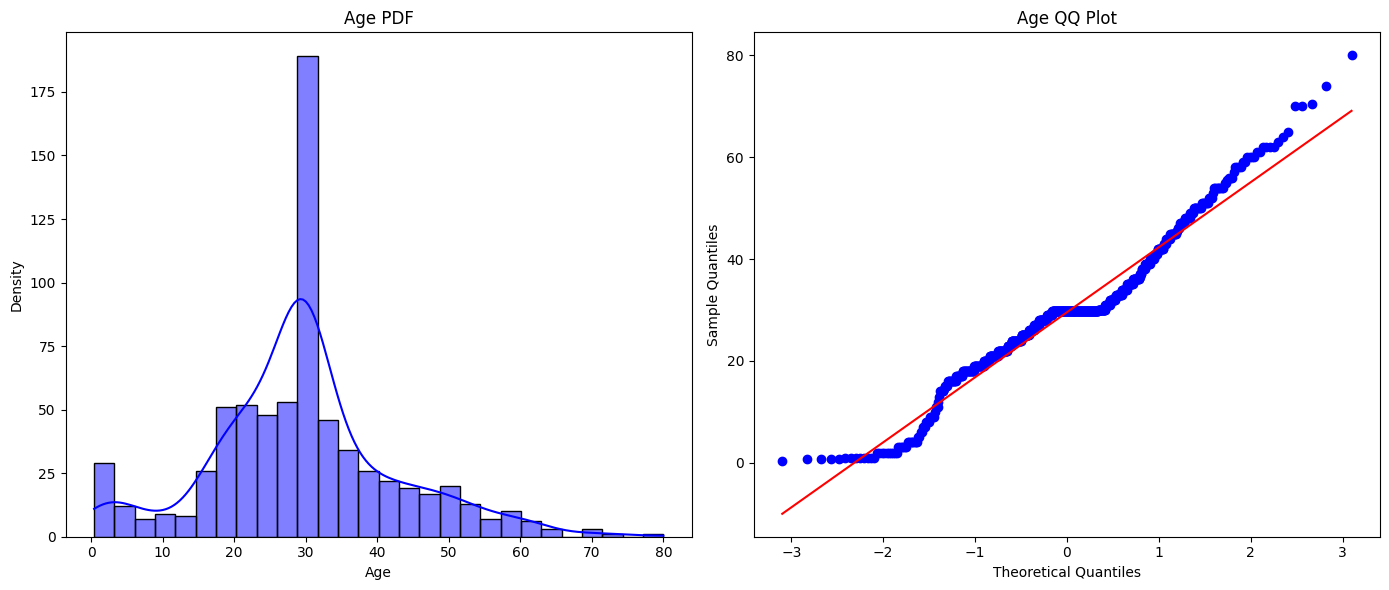

In [30]:
# Corrected code
plt.figure(figsize=(14, 6))

# First subplot: Age PDF
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.histplot(data=X_trian, x="Age", kde=True, color="blue")  # Use histplot instead of displot
plt.title("Age PDF")
plt.xlabel("Age")
plt.ylabel("Density")

# Second subplot: Age QQ Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
stats.probplot(X_trian['Age'], dist='norm', plot=plt)
plt.title("Age QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Show the plots
plt.tight_layout()  # Adjust spacing to prevent overlap
plt.show()


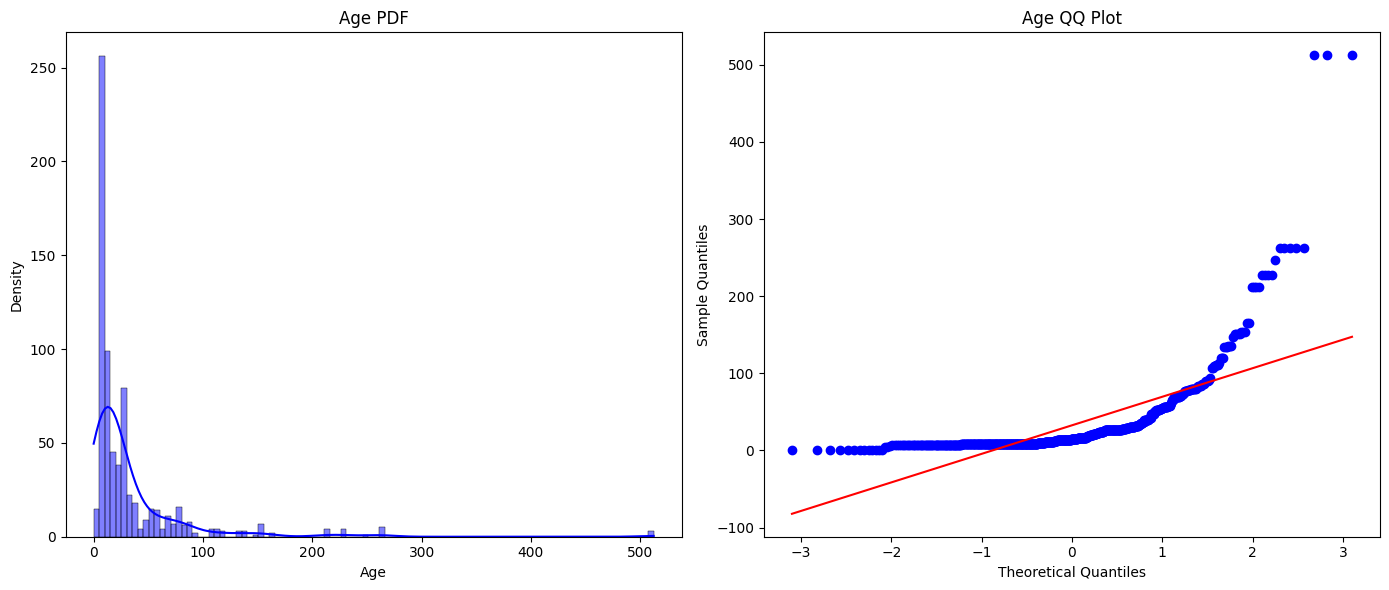

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Corrected code
plt.figure(figsize=(14, 6))

# First subplot: Age PDF
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.histplot(data=X_trian, x="Fare", kde=True, color="blue")  
plt.title("Age PDF")
plt.xlabel("Age")
plt.ylabel("Density")

# Second subplot: Age QQ Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
stats.probplot(X_trian['Fare'], dist='norm', plot=plt)
plt.title("Age QQ Plot")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Show the plots
plt.tight_layout()  
plt.show()


In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [38]:
clf.fit(X_trian, y_train)
clf2.fit(X_trian, y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

print("Accuracy of LR", accuracy_score(y_test, y_pred))
print("Accuracy of DT", accuracy_score(y_test, y_pred1))

Accuracy of LR 0.6480446927374302
Accuracy of DT 0.664804469273743


## Applying Function Transformer

In [39]:
trf = FunctionTransformer(func=np.log1p)

In [40]:
X_trian_transformer = trf.fit_transform(X_trian)
X_test_transformer = trf.transform(X_test)

In [43]:
X_trian_transformer.head(3)

,Age,Fare
331,3.839452,3.384390
733,3.178054,2.639057
382,3.496508,2.188856


In [41]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [44]:
clf.fit(X_trian_transformer, y_train)
clf2.fit(X_trian_transformer, y_train)

y_pred = clf.predict(X_test_transformer)
y_pred1 = clf2.predict(X_test_transformer)

print("Accuracy of LR", accuracy_score(y_test, y_pred))
print("Accuracy of DT", accuracy_score(y_test, y_pred1))

Accuracy of LR 0.6815642458100558
Accuracy of DT 0.6871508379888268


In [45]:
X_transformed = trf.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR", np.mean(cross_val_score(clf, X_transformed, y, scoring='accuracy', cv=10)))
print("DT", np.mean(cross_val_score(clf2, X_transformed, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6610861423220974


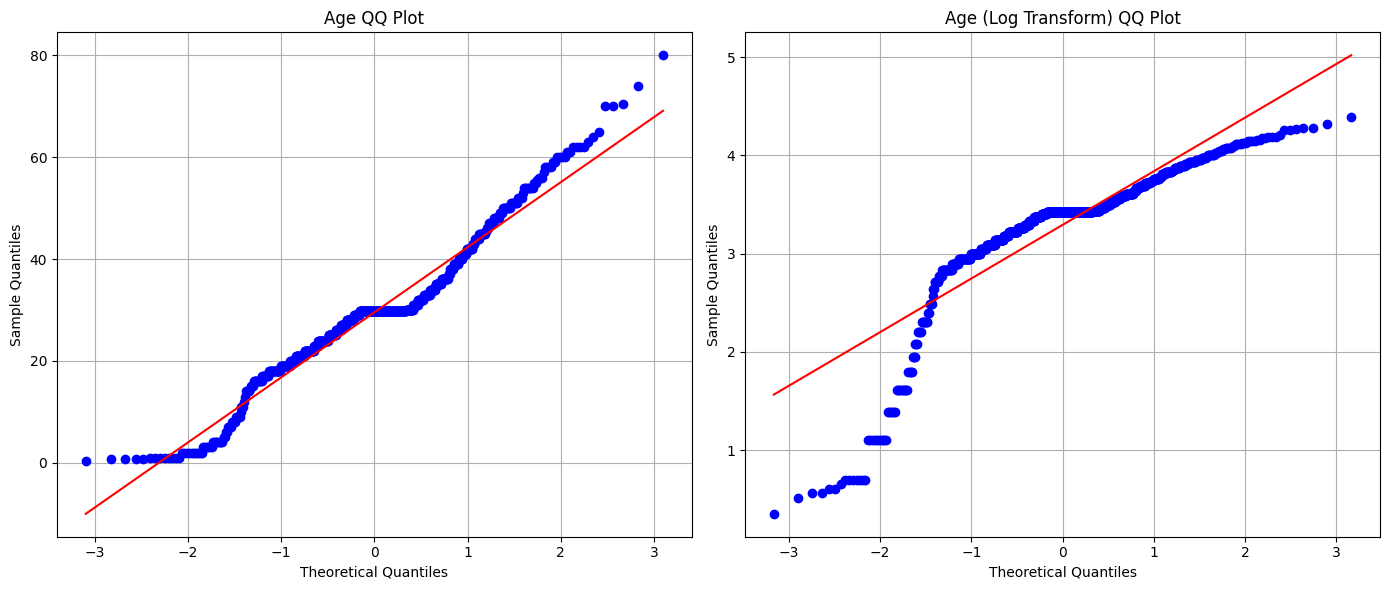

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Create a side-by-side layout

# First QQ Plot
stats.probplot(X_trian['Age'], dist="norm", plot=axes[0])
axes[0].set_title("Age QQ Plot")
axes[0].set_xlabel("Theoretical Quantiles")
axes[0].set_ylabel("Sample Quantiles")
axes[0].grid(True)

# Second QQ Plot
stats.probplot(X_transformed['Age'], dist="norm", plot=axes[1])
axes[1].set_title("Age (Log Transform) QQ Plot")
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Sample Quantiles")
axes[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


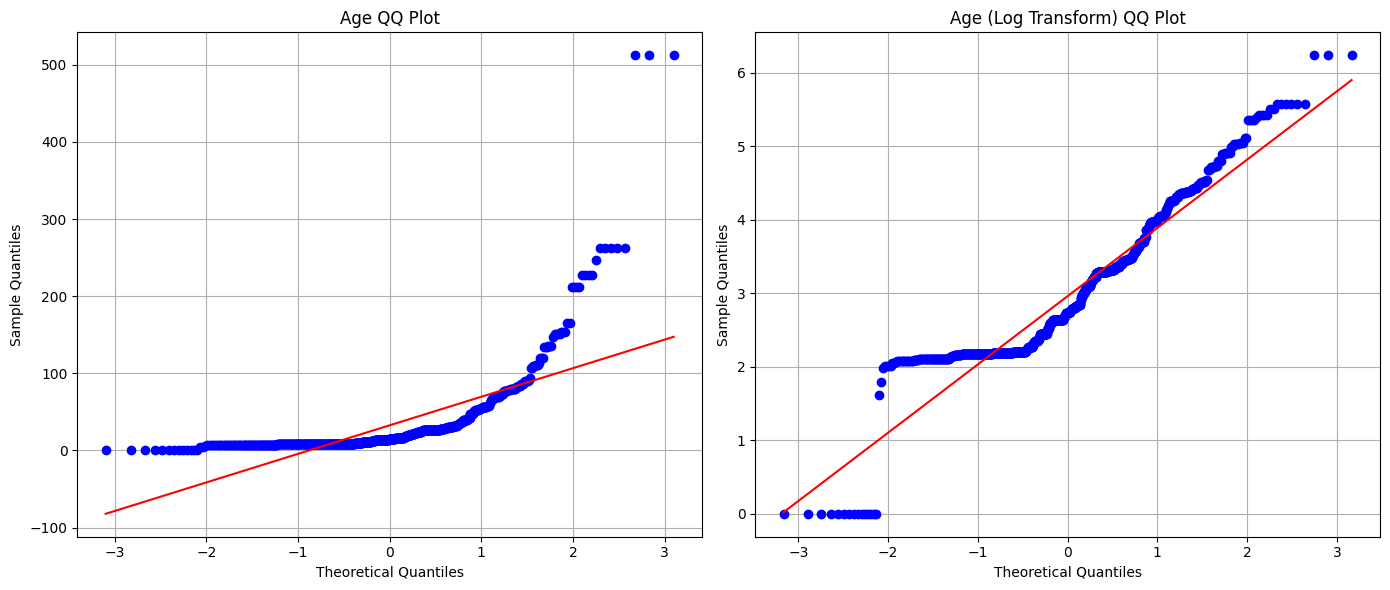

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Create a side-by-side layout

# First QQ Plot
stats.probplot(X_trian['Fare'], dist="norm", plot=axes[0])
axes[0].set_title("Age QQ Plot")
axes[0].set_xlabel("Theoretical Quantiles")
axes[0].set_ylabel("Sample Quantiles")
axes[0].grid(True)

# Second QQ Plot
stats.probplot(X_transformed['Fare'], dist="norm", plot=axes[1])
axes[1].set_title("Age (Log Transform) QQ Plot")
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Sample Quantiles")
axes[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

`From that graph we can see before applying log transformer in AGE column was better so again model train without Log transform`

In [50]:
trf2 = ColumnTransformer(transformers=[
    ('log', FunctionTransformer(np.log1p), ['Fare'])
    ], remainder='passthrough')

In [51]:
X_trian_transfer2 = trf2.fit_transform(X_trian)
X_test_transfer2 = trf2.transform(X_test)

In [52]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [53]:
clf.fit(X_trian_transfer2, y_train)
clf2.fit(X_trian_transfer2, y_train)

DecisionTreeClassifier()

In [54]:
y_pred = clf.predict(X_test_transfer2)
y_pred1 = clf2.predict(X_test_transfer2)

print("Accuracy of LR", accuracy_score(y_test, y_pred))
print("Accuracy of DT", accuracy_score(y_test, y_pred1))

Accuracy of LR 0.6703910614525139
Accuracy of DT 0.6480446927374302


In [56]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6589013732833957


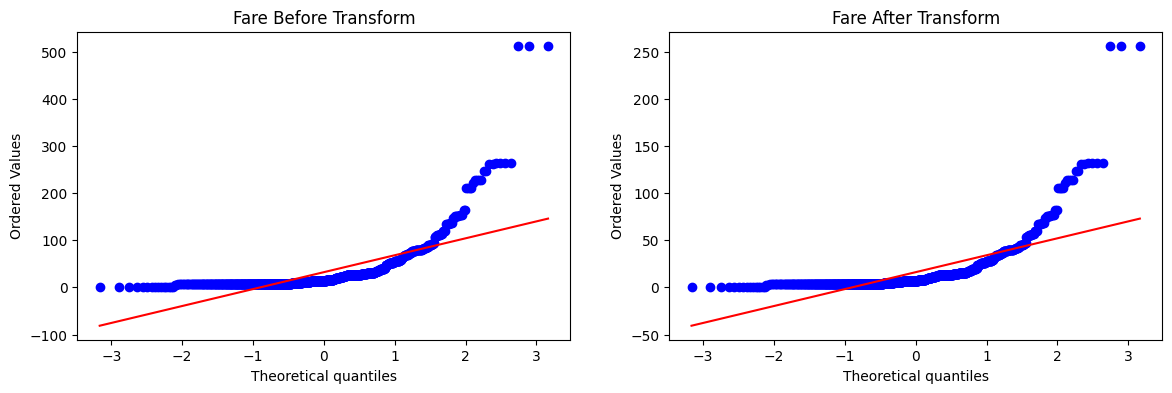

In [59]:
apply_transform(lambda x: x**1/2)

Accuracy 0.61729088639201


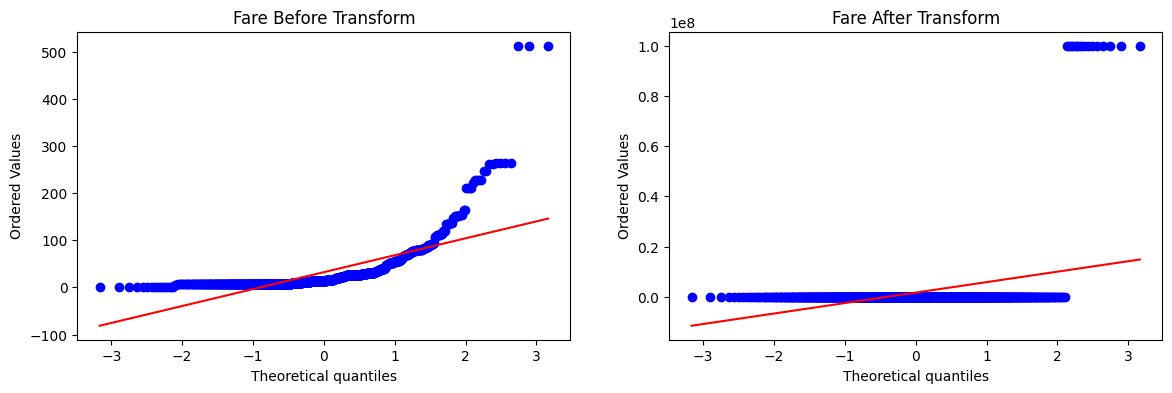

In [60]:
## Reciprocal
apply_transform(lambda x: 1/(x+.00000001))

Accuracy 0.6195131086142323


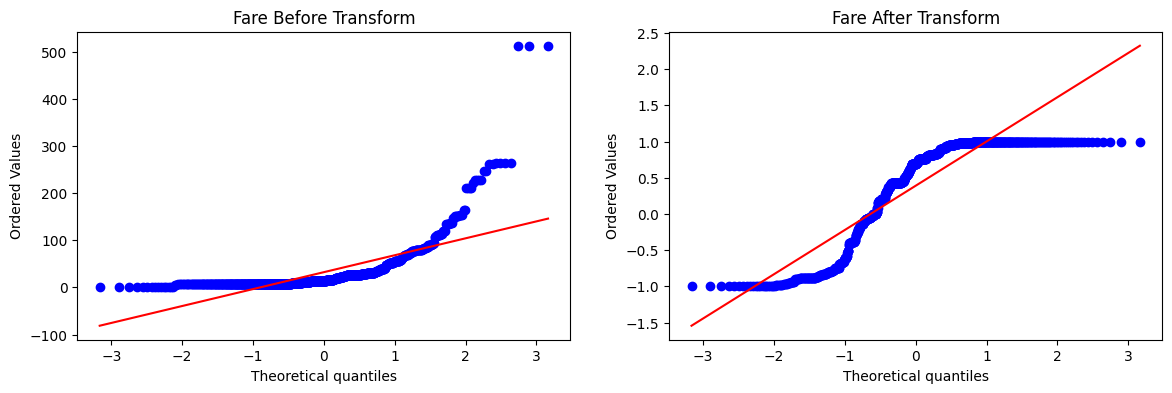

In [62]:
apply_transform(np.sin)